priemro calculamos el indice de alguna de las imagenes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

lista = [2, 4, 6, 8, 10]
media = np.mean(lista)
print("La media de la lista es:", media)


La media de la lista es: 6.0


In [20]:
bandas = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'WVP', 'AOT', 'SCL', 'sunAzimuthAngles', 'sunZenithAngles', 'viewAzimuthMean', 'viewZenithMean']
datesTrain = [["2022-01-01", "2022-01-28"],["2022-02-01", "2022-02-28"],["2022-03-01", "2022-03-28"],["2022-04-01", "2022-04-28"],["2022-05-01", "2022-05-28"],["2022-06-01", "2022-06-28"],
              ["2022-07-01", "2022-07-28"],["2022-08-01", "2022-08-28"],["2022-09-01", "2022-09-28"],["2022-10-01", "2022-10-28"],["2022-11-01", "2022-11-28"],
              ["2022-12-01", "2022-12-28"],["2023-01-01", "2023-01-28"],["2023-02-01", "2023-02-28"],["2023-03-01", "2023-03-28"],["2023-04-01", "2023-04-28"],["2023-05-01", "2023-05-28"]
               ];
mes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16];
datesTest = [["2023-05-01", "2023-05-28"]];
indicesNDVI =[]
meanNDVI = []
#for banda in bandas:
for date in datesTrain:
    #print(f"DB/{date[1]}banda{bandas[3]}.TIF")
    banda4 = np.asarray(Image.open(f"DB/{date[1]}banda{bandas[3]}.TIF"))    
    banda8A = np.asarray(Image.open(f"DB/{date[1]}banda{bandas[8]}.TIF"))
    #NORMALIZAR LA MUESTRA
    #banda4_norm = banda4 / banda4.max()
    #banda8A_norm = banda8A / banda8A.max()
    indicesNDVI.append((banda8A-banda4)/(banda8A+banda4))
    meanNDVI.append(np.mean(indicesNDVI))
    #plt.imshow(NDVI)
            
#plt.imshow(indicesNDVI[0])
meanNDVItrain = meanNDVI[:len(meanNDVI)-1]
meanNDVItest = meanNDVI[len(meanNDVI)-1:]

In [21]:
mediaArray = np.mean(meanNDVItrain[2])
#print("La media de la lista es:", media)
print(len(meanNDVItest))

1


En este primer ejercisio usare el ajuste polinomial para generar un polinomio que prediga el resultado del valor promedio del NDVI en este caso probare con un polinomio de grado 2


In [38]:
coef = np.polyfit(mes,meanNDVItrain,4)
predict = np.polyval(coef, 5);
print(f"el valor predicho para el mes 5 de 2023 es de: {predict} y el valor real es {meanNDVItest[0]}")
print(f"error de: {abs(predict-meanNDVItest[0])}")
print(f"error del %: {meanNDVItest[0]/abs(predict-meanNDVItest[0])}")
print(meanNDVItrain)

el valor predicho para el mes 5 de 2023 es de: 0.4090781763392195 y el valor real es 0.5167591701714447
error de: 0.10768099383222518
error del %: 4.79898217671164
[0.006691914845392028, 0.1924991114094102, 0.283805117331982, 0.3527514713005765, 0.39445004398372335, 0.43900536525471406, 0.47103401286730523, 0.4892557797972479, 0.5038963450813135, 0.5168614082944899, 0.5291247013990276, 0.5247684897588584, 0.5228644756164663, 0.5112301764824413, 0.510061895880231, 0.5109186452414731]


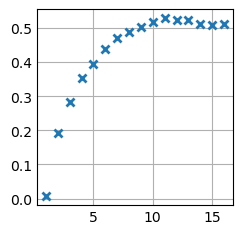

In [37]:
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')
# plot
fig, ax = plt.subplots()
ax.plot(mes, meanNDVItrain, 'x', markeredgewidth=2)
#ax.plot(mes, meanNDVItrain, linewidth=2.0)
#ax.plot(mes, meanNDVItrain, 'o-', linewidth=2)
plt.show()


In [ ]:
NDVI = (banda8A_norm-banda4_norm)/(banda8A_norm+banda4_norm)
plt.imshow(NDVI)